### Leerdoelen
- Je leert een Business Understanding te formuleren bij een opdrachtgever en een gegeven dataset. 
- Je leert wat een decision tree is
- Je leert werken met decision trees in Python
- Je leert je conslusies uit het Data Understanding te verbinden aan de uitkomst van je decision tree
- Je leert een keuze tussen decision trees van verschillende complexiteit
- Je leert de voorspellingen van je decision tree beoordelen. 

### Achtergrondinformatie:
- Google naar:
    - `python sklearn decision tree`
    - `python sklearn knn`
    - `description adult dataset`
    - `python seaborn FacetGrid`
    - `pandas create dummy variables`
    - (optioneel) `python sklearn visualise decision tree`
- Datacamp course `Machine Learning with Tree-Based Models in Python` -> `Classification and Regression Trees`

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 

# Business Understanding
De gemeente Boston in de VS worstelt met armoede problematiek. Een probleem voor de gemeente is dat ze geen inzicht hebben in welke factoren van invloed zijn op of een persoon wel of niet arm is. Om dit inzicht te verkrijgen heeft de gemeente jullie benaderd om hier inzicht in te verschaffen. 

- Begrijp je de vraag die gesteld wordt? 
- Heb je voldoende kennis van het domein (auto’s) om de data te kunnen begrijpen?

# Les 1
# Data Understanding

In [116]:
# [10 min] Importeer hier de relevante bibiliotheken en daarna het gegeven bestand. 
# Voer hier je Data Understanding uit zoals je gewend bent

# Handige Jupyter magic
%config IPCompleter.greedy = True
%matplotlib inline

import pandas as pd
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
import seaborn as sn

adult = pd.read_csv('adult.csv')

print(adult.describe().transpose())
adult


                  count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
 fnlwgt         32561.0  189778.366512  105549.977697  12285.0  117827.0   
 education-num  32561.0      10.080679       2.572720      1.0       9.0   
capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
 fnlwgt         178356.0  237051.0  1484705.0  
 education-num      10.0      12.0       16.0  
capital-gain         0.0       0.0    99999.0  
capital-loss         0.0       0.0     4356.0  
hours-per-week      40.0      45.0       99.0  


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above_or_below_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Een van de consultants van de klant heeft al een stuk analyse uitgevoerd. Zijn hypothese was dat opleidingsniveau, sekse en leeftijd een grote rol spelen. Hieronder staat zijn analyse (code+illustratie). Wat is jou inschatting? Ben je het eens met de inschatting van de consultant van de klant?**

In [117]:
# [10 min] Op dit moment zijn de labels in kolom above_or_below_50k aangegeven met ' <=50K' en ' >50K'. Let op de spaties in de tekst.
# Voor de leesbaarheid willen we dit vervangen met 'below' en 'above'. Vervang de data in de kolommen hiermee.

def replace(currentValue):
    if '<' in currentValue:
        return 'below'
    else:
        return 'above' 
    
adult['above_or_below_50k'] = adult['above_or_below_50k'].apply(replace)
adult


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above_or_below_50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,below
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,below
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,below
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,below
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,below
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,below
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,above
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,below
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,below


In [118]:
def get_pct_above_50k(vec):
    cnt = vec.value_counts()
    try:
        return 100 - ((cnt['below'] / sum(cnt)) * 100)
    except KeyError:
        return 100
    
res = adult[[' education-num', 'sex', 'age', 'above_or_below_50k']] \
          .groupby([' education-num', 'sex', 'age'])\
          .agg(get_pct_above_50k).reset_index()
res.head()

,education-num,sex,age,above_or_below_50k
0,1,Female,23,0.0
1,1,Female,24,0.0
2,1,Female,31,0.0
3,1,Female,32,0.0
4,1,Female,34,0.0


Leeftijd speelt geen grote rol, dit is te zien aan het feit dat alle above_or_below_50k op 0.0 staan.

In [119]:
## [10 min] Bekijk de code hierboven en leg uit wat je ziet



c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


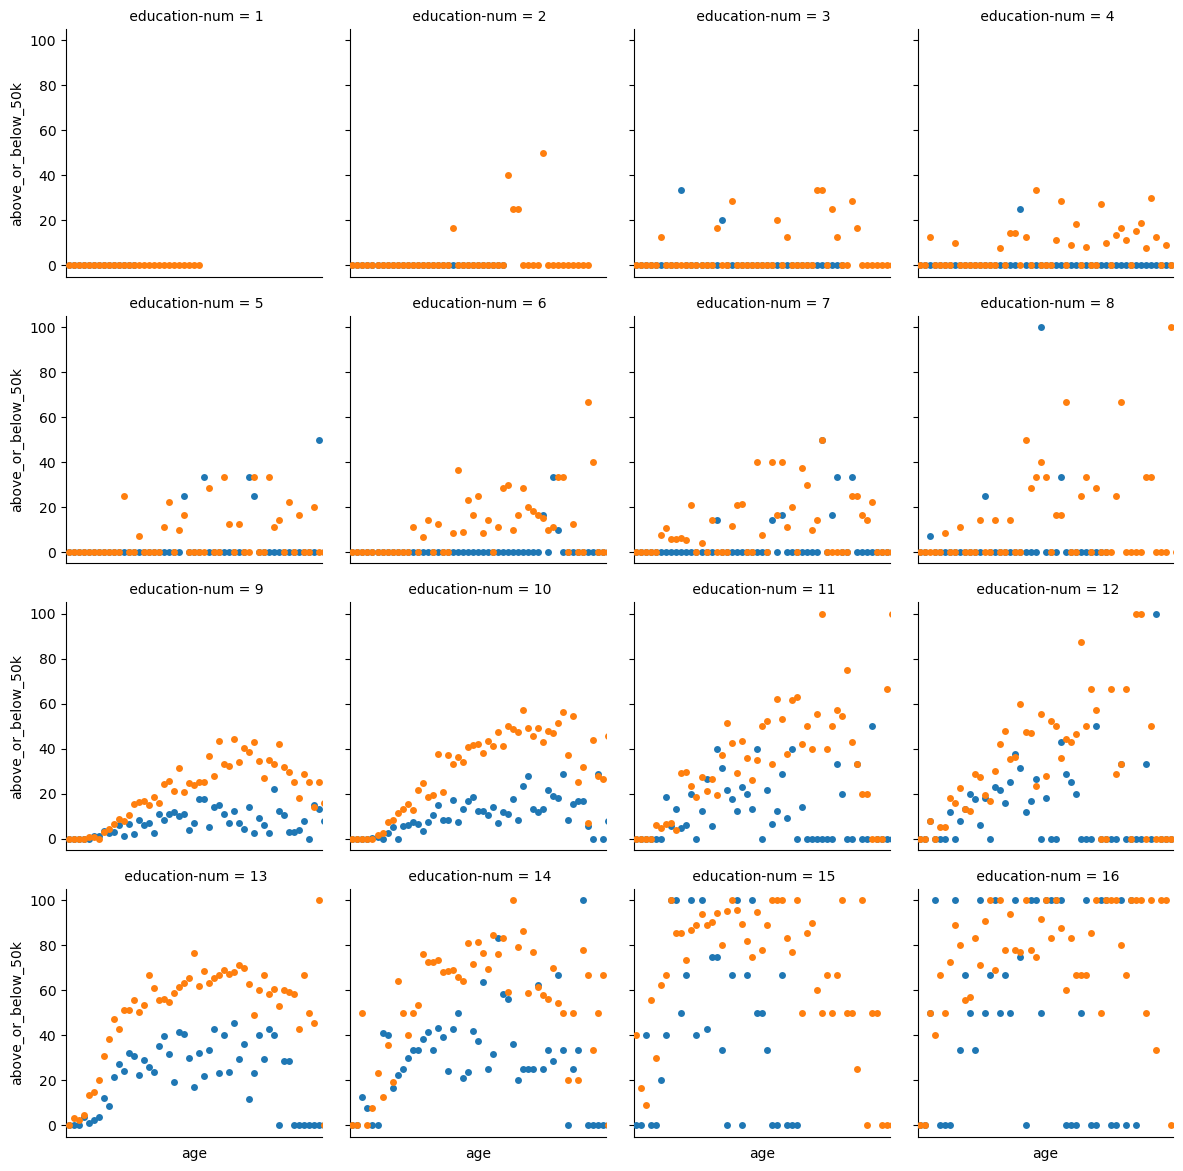

In [120]:
g = sn.FacetGrid(res, col=' education-num', hue='sex', col_wrap=4)
h = g.map(sn.stripplot, 'age', 'above_or_below_50k', jitter=False)
g.set(xticks=[])

In [121]:
## [5 min] Wat vind je van de hypothese van de consultant van de klant? Onderbouw je mening vanuit de gegeven illustratie
sn.__version__

'0.11.2'

Het lijkt erop dat opleiding

# Data Preparation
**Prepareer de data voor de modeling stap.** 

In [122]:
# [5 min] Verdeel de data in twee dataframe's: eentje voor de afhankelijke variabele, en eentje
# voor de onafhankelijke variabele
afhankelijke_variabele = adult[['above_or_below_50k']]
print(afhankelijke_variabele.head())
onafhankelijke_variabele = adult[['sex', 'age', ' education-num']]
print(onafhankelijke_variabele.head())

  above_or_below_50k
0              below
1              below
2              below
3              below
4              below
       sex  age   education-num
0     Male   39              13
1     Male   50              13
2     Male   38               9
3     Male   53               7
4   Female   28              13


### Werken met categorische data
Tot nu toe hebben we alleen gewerkt met numerieke variabelen, maar in de praktijk werken we ook veel met categorische variabelen. Bij de les over lineare regressie hebben we het hier al kort over gehad (`"mpg ~ wt + C(cyl)"`, maar hier gaan we iets meer de diepte in. 

In de praktijk komen we categorische data op twee manieren tegen:

- Als tekst. Een goed voorbeeld hiervan is de `sex` kolom in de data waarmee we nu werken. Hier kan de decision tree niet goed mee omgaan. 
- Als getal. Een goed voorbeeld hiervan is de `cyl` kolom uit de regressie les. De getallen stellen we het aantal cylinders voor, maar je kunt geen 3.5 cillinders hebben. 

In beide gevallen moeten we de variabelen omzetten naar een zogenaamde dummy variabele. 

In [123]:
# [5 min] Genereer hier de dummy variabele voor de `sex` kolom via pd.get_dummies. Doe dit voor 
#         zowel `drop_first=True` als `drop_first=False`

onafhankelijke_variabele = pd.get_dummies(onafhankelijke_variabele, columns=['sex'], drop_first=True)
onafhankelijke_variabele.head()


,age,education-num,sex_ Male
0,39,13,1
1,50,13,1
2,38,9,1
3,53,7,1
4,28,13,0


Met `drop_first=True` krijgen we twee kolommen:

- `Female` welke 1 is als de persoon een vrouw is en 0 als dit niet het geval is
- `Male` welke 1 is als de persoon een man is en 0 als dit niet het geval is

Als we `drop_first=False` gebruiken houden we nog maar 1 kolom over, `Male`. Deze is 1 als de persoon een man is, en 0 als de persoon een vrouw is. We kunnen dus alle informatie over man vs vrouw vastleggen in maar 1 kolom. Dit is waarom we eigenlijk altijd `drop_first=True` gebruiken als we handmatig dummies maken. Dit is trouwens ook het gedrag van statsmodels als we `C(cyl)` gebruiken. 

Belangrijk hier is dat we van de `education-num` variabele geen dummies maken, terwijl ook dit een categorische variabele is. De reden waarvoor is een buiten de scope van dit college, maar details zijn [hier te vinden](https://web.archive.org/web/20200924113639/https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/). 

# Modeling: het leeftijdsmodel
**Maak hier een decision tree model tussen boven of onder 50k dollar en de leeftijd. Beoordeel de performance met behulp van een confusion matrix en de f1 score. Wat zijn je observaties?**

In [131]:
## [20 min] Importeer vanuit sklearn de volgende onderdelen: DecisionTreeClassifier, train_test_split, f1_score, confusion_matrx
## Splits je dataset in een trainingset en een testset
## Fit vervolgens een beslissingsboom via de DecisionTreeClassifier functie en geef daar de confusion matrix voor
## Wat is de F1 score voor je model? Wat betekend dit?

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(onafhankelijke_variabele[['age']], afhankelijke_variabele, test_size=0.3)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['below', 'above'], index=['below', 'above'])

print(f1_score(y_test, y_pred, pos_label='above'))

# visualize confusion matrix using sklearn 
cm

0.0


,below,above
below,0,2292
above,0,7477


In [125]:
# [10 min] Optioneel: deel de rijen van de confusion matrix door de som van de rij. Dan krijg je de fractie die valt in die categorie.

# Les 2
# Modeling: alle modellen
**[60 min] Maak hier een aantal decision tree modellen met alle combinaties van de onafhankelijke variabelen age, sex, education en. Dit levert een set aan decision tree modellen. Maak de performance van de modellen inzichtelijk via een confusion matrix en de f1_score. Wat zijn je observaties?**

In [126]:
# [20 min] maak een functie waarin het decision tree model wordt getraind o.b.v. ……. en die de f1-score en confusion matrix voor dit model terug geeft,

In [127]:
# [30 min] Met de onafhankelijke variabelen leeftijd, geslacht en opleiding kunnen we met zes (berekening: 3!) verschillende 
# decision tree modellen alle mogelijke model-alternatieven bekijken. Train deze zes decision tree modellen en vergelijk 
# de f1-scores en confusion matrices voor deze modellen.  


In [128]:
# [10 min] Welk model adviseer jij om te gebruiken? Onderbouw je antwoord m.b.v. de f1_scores en confusion matrices. 

In [129]:
# [20 min] Maak voor het geadviseerde model ook een visualisatie van de daadwerkelijk boomstructuur. 
# Voor inspiratie over hoe dit moet gebruik de volgende link: https://scikit-learn.org/stable/modules/tree.html

# Evaluation
**[10 min] Vul dit aan vanuit je Modeling. Welke inzichten kunnen wij de gemeente Boston geven over factoren die van invloed zijn op armoede m.b.v. het geadviseerde decision tree model. Neem hier de f_score, de confusion matrices en de gevisualiseerde boom in mee.**